<a href="https://colab.research.google.com/github/wilsonfffs/CODING-DOJO/blob/main/Ejercicios_de_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
# cargar el conjunto de datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# ver la forma del conjunto de datos
mnist.data.shape

(70000, 784)

In [3]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [4]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

In [5]:
X.min(), X.max()

(pixel1      0.0
 pixel2      0.0
 pixel3      0.0
 pixel4      0.0
 pixel5      0.0
            ... 
 pixel780    0.0
 pixel781    0.0
 pixel782    0.0
 pixel783    0.0
 pixel784    0.0
 Length: 784, dtype: float32, pixel1       0.0
 pixel2       0.0
 pixel3       0.0
 pixel4       0.0
 pixel5       0.0
             ... 
 pixel780    62.0
 pixel781     0.0
 pixel782     0.0
 pixel783     0.0
 pixel784     0.0
 Length: 784, dtype: float32)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(X_train)
standardized_data.shape

(52500, 784)

In [9]:
cov_matrix = np.matmul(standardized_data.T, standardized_data)
cov_matrix.shape

(784, 784)

In [10]:
from scipy.linalg import eigh

In [11]:

lambdas, vectors = eigh(cov_matrix, eigvals=(782, 783))
vectors.shape

(784, 2)

In [12]:
vectors = vectors.T
vectors.shape

(2, 784)

In [13]:
# Instanciar y ajustar datos usando PCA
pca = PCA()
pca.fit(standardized_data)

PCA()

Text(0, 0.5, 'Proportion of Explained Variance')

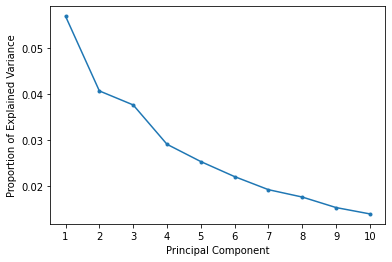

In [14]:
# Graficar los ratios de varianza explicadas de los primeros 10 componentes principales
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker = '.')
plt.xticks(ticks = range(1, 11))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [15]:
# Ajustar PCA
pca = PCA(n_components = 12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# ajustar regresión logística
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

LogisticRegression()

In [16]:
print('Training accuracy:', logreg.score(X_train_pca, y_train))
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Training accuracy: 0.8253142857142857
Testing accuracy: 0.8273142857142857


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca[:, :35], y_train)

predict_labels = knn.predict(X_test_pca[:, :35])

In [23]:
predict_labels

array([8, 4, 3, ..., 5, 9, 2])

In [24]:
Submission = pd.DataFrame({
        "ImageId": range(1, predict_labels.shape[0]+1),
        "Label": predict_labels
    })

Submission.head(5)

,ImageId,Label
0,1,8
1,2,4
2,3,3
3,4,7
4,5,7
